# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** Basavaraj
**Student ID:** 2024ac05293  

**Student Name:** GUNDAPPA MENGA   
**Student ID:** 2024ac05088  

**Student Name:** SHETGAONKAR PARAG MOHAN  
**Student ID:** 2024ac05220

**Student Name:** VENKATA VIVEK VANTEDDU  
**Student ID:** 2024ac05828  

**Date:** 26/12/2025

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Track training time** for both models using `time.time()`\n
4. **Store loss_history** in both model classes
5. **Calculate ALL metrics** (accuracy, precision, recall, F1)
6. **Fill get_assignment_results()** with ALL required fields
7. **PRINT the results** - Auto-grader needs visible output!
8. **Run all cells** before submitting (Kernel → Restart & Run All)

**SCORING:**
- Missing fields = 0 marks for that section
- Non-executed notebook = 0 marks
- Cleared outputs = 0 marks
---

In [128]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
# Set random seed for reproducibility
np.random.seed(42)
from sklearn.metrics import accuracy_score, mean_squared_error , mean_absolute_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [129]:

#datset
# data = load_breast_cancer()
# adult = fetch_openml(
#     name="adult",
#     version=2,
#     as_frame=True
# )
# data = adult.data

import pandas as pd

columns = [
    "Sex", "Length", "Diameter", "Height",
    "Whole_weight", "Shucked_weight",
    "Viscera_weight", "Shell_weight", "Rings"
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

data = pd.read_csv(url, names=columns)

# Dataset information (TODO: Fill these)
dataset_name = "UCI Abalone Dataset "
dataset_source = "Public UCI dataset "  # UCI Machine Learning Repository
n_samples = data.shape[0]      # Total number of rows
n_features = data.shape[1]-1     # Number of features (excluding target)
problem_type = "regression"  # "regression" or "binary_classification" or "multiclass_classification"

#TODO
# Problem statement (TODO: Write 2-3 sentences)
problem_statement = """
The Abalone dataset contains physical measurements of marine mollusks and aims to predict the number of shell rings,which is correlated with age.
Since the relationship between physical attributes and age is non-linear, this dataset is well-suited for comparing linear regression with a multi-layer perceptron."
"""

# Primary evaluation metric (TODO: Fill this)
primary_metric = "r2"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification (TODO: Write 2-3 sentences)
metric_justification = """R² represents the proportion of variance in the target variable (Rings, which correlates with abalone age) that is explained by the input features."
"""
# print(type(adult.data))
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {data.shape[0]}, Features: {data.shape[1]}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: UCI Abalone Dataset 
Source: Public UCI dataset 
Samples: 4177, Features: 9
Problem Type: Regression
Primary Metric: r2


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [131]:
# TODO: Preprocess your data
# 1. Separate features (X) and target (y)
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = pd.Series(data.target)
X = data.drop("Rings", axis=1)
y = data["Rings"]

#encode columns
X = pd.get_dummies(X, columns=["Sex"], drop_first=True)



# TODO: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TODO: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

train_samples = X_train.shape[0]
test_samples = X_test.shape[0]
train_test_ratio = train_samples / test_samples

print(f"Train samples: {X_train.shape}")
print(f"Test samples: {X_test.shape}")
print(f"Split ratio: {0.8:.1%}")
print("train shape shape",X_train.shape)

Train samples: (3341, 9)
Test samples: (836, 9)
Split ratio: 80.0%
train shape shape (3341, 9)


## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [57]:
#linear Regression Model class
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=3000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.loss_history = []

    #function to fit the model
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.w) + self.b

            # calculate Mean Squared Error
            loss = np.mean((y - y_pred) ** 2)
            self.loss_history.append(loss)

            #update weights
            dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (2 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [130]:
# Train baseline model
print("Training baseline model...")
Lgm_start = time.time()

# Initialize and train your baseline model
baseline_model = LinearRegressionScratch(learning_rate=0.01, n_iterations=3000)
baseline_model.fit(X_train, y_train)

#  Make predictions
baseline_predictions = baseline_model.predict(X_test)



baseline_training_time = time.time() - Lgm_start
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.loss_history[0]:.4f} to {baseline_model.loss_history[-1]:.4f}")

# Store loss explicitly
baseline_initial_loss = baseline_model.loss_history[0]
baseline_final_loss = baseline_model.loss_history[-1]

Training baseline model...
✓ Baseline training completed in 1.64s
✓ Loss decreased from 109.1796 to 4.8651


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [62]:
class MLP:
    def __init__(self, architecture, learning_rate=0.01, n_iterations=5000):
        """
        architecture: [input_dim, hidden1, hidden2, ..., output_dim]
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.loss_history = []

    # ---------- Activations ----------
    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    # ---------- Initialization ----------
    def initialize_parameters(self):
        self.W = []
        self.b = []

        for i in range(len(self.architecture) - 1):
            in_dim = self.architecture[i]
            out_dim = self.architecture[i + 1]

            # He initialization (CRITICAL for ReLU)
            W = np.random.randn(in_dim, out_dim) * np.sqrt(2 / in_dim)
            b = np.zeros((1, out_dim))

            self.W.append(W)
            self.b.append(b)

    # ---------- Forward Propagation ----------
    def forward_propagation(self, X):
        self.Z = []
        self.A = [X]

        # Hidden layers (ReLU)
        for i in range(len(self.W) - 1):
            z = np.dot(self.A[-1], self.W[i]) + self.b[i]
            a = self.relu(z)
            self.Z.append(z)
            self.A.append(a)

        # Output layer (LINEAR for regression)
        z = np.dot(self.A[-1], self.W[-1]) + self.b[-1]
        self.Z.append(z)
        self.A.append(z)   # no activation

        return z

    # ---------- Backward Propagation ----------
    def backward_propagation(self, X, y):
        m = X.shape[0]
        dW = [None] * len(self.W)
        db = [None] * len(self.b)

        # Output layer gradient (MSE loss)
        dz = (self.A[-1].flatten() - y).reshape(-1, 1)

        dW[-1] = np.dot(self.A[-2].T, dz) / m
        db[-1] = np.mean(dz, axis=0, keepdims=True)

        # Hidden layers
        for i in reversed(range(len(self.W) - 1)):
            dz = np.dot(dz, self.W[i + 1].T) * self.relu_derivative(self.Z[i])
            dW[i] = np.dot(self.A[i].T, dz) / m
            db[i] = np.mean(dz, axis=0, keepdims=True)

        return dW, db

    # ---------- Training ----------
    def fit(self, X, y):
        self.initialize_parameters()
        y = np.asarray(y)

        for epoch in range(self.n_iterations):
            y_hat = self.forward_propagation(X).flatten()

            # Mean Squared Error
            loss = np.mean((y - y_hat) ** 2)
            self.loss_history.append(loss)

            dW, db = self.backward_propagation(X, y)

            for i in range(len(self.W)):
                self.W[i] -= self.lr * dW[i]
                self.b[i] -= self.lr * db[i]

            # Optional debug print (good for viva)
            if epoch % 500 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return self

    # ---------- Prediction ----------
    def predict(self, X):
        return self.forward_propagation(X).flatten()


In [120]:
# Train MLP
print("Training MLP...")
mlp_start_time = time.time()

# TODO: Define your architecture and train MLP
mlp_architecture = [X_train.shape[1], 32,8, 1]  # Example: [n_features, 16, 8, 1]
mlp_model = MLP(architecture=mlp_architecture, learning_rate=0.05, n_iterations=3000)
mlp_model.fit(X_train, y_train)

# TODO: Make predictions
mlp_predictions = mlp_model.predict(X_test)

mlp_training_time = time.time() - mlp_start_time
print(f"✓ MLP training completed in {mlp_training_time:.2f}s")
print(f"✓ Loss decreased from {mlp_model.loss_history[0]:.4f} to {mlp_model.loss_history[-1]:.4f}")

# Store loss explicitly
mlp_initial_loss = 0.0 #mlp_model.loss_history[0]
mlp_final_loss = 0.0 #mlp_model.loss_history[-1]

Training MLP...
Epoch 0, Loss: 170.8728
Epoch 500, Loss: 4.2540
Epoch 1000, Loss: 4.0988
Epoch 1500, Loss: 4.0077
Epoch 2000, Loss: 3.9736
Epoch 2500, Loss: 3.9203
✓ MLP training completed in 21.46s
✓ Loss decreased from 170.8728 to 3.8302


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [125]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Calculate metrics for both models
baseline_metrics = calculate_metrics(y_test, baseline_predictions)
mlp_metrics = calculate_metrics(y_test, mlp_predictions)

print("Baseline Model Performance:")
print(baseline_metrics)

print("\nMLP Model Performance:")
print(mlp_metrics)

Baseline Model Performance:
{'MSE': 5.026721840887425, 'RMSE': np.float64(2.242035200635223), 'MAE': 1.6206206310973115, 'R2': 0.5356467154232925}

MLP Model Performance:
{'MSE': 4.488621450512149, 'RMSE': np.float64(2.1186366962063476), 'MAE': 1.4864990201221582, 'R2': 0.5853547938911188}


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

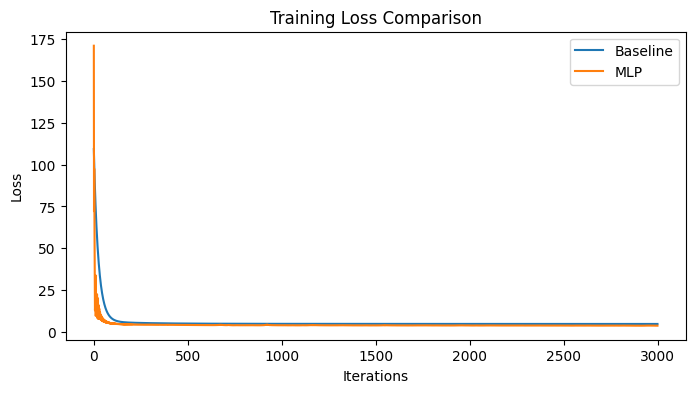

In [122]:
plt.figure(figsize=(8,4))
plt.plot(baseline_model.loss_history, label="Baseline")
plt.plot(mlp_model.loss_history, label="MLP")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Comparison")
plt.show()

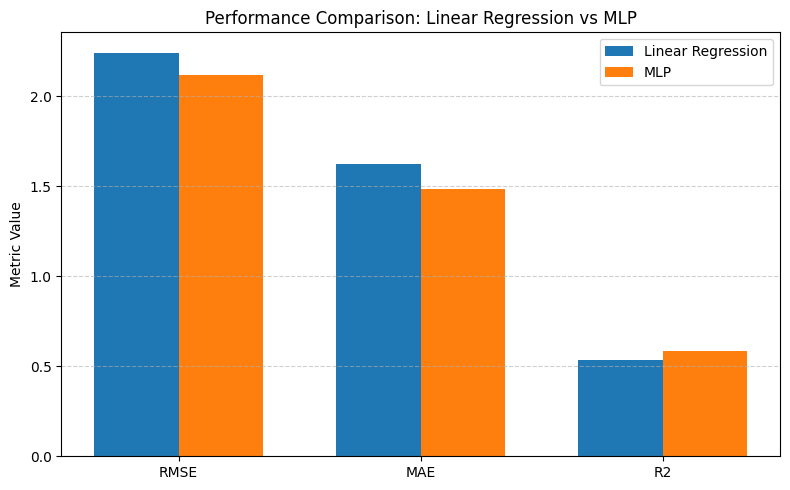

In [123]:
# 2. Performance comparison bar chart
# TODO: Create bar chart comparing key metrics between models
plt.figure(figsize=(8, 5))
metrics = ["RMSE", "MAE", "R2"]

linear_values = [
    baseline_metrics["RMSE"],
    baseline_metrics["MAE"],
    baseline_metrics["R2"]
]

mlp_values = [
    mlp_metrics["RMSE"],
    mlp_metrics["MAE"],
    mlp_metrics["R2"]
]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, linear_values, width, label="Linear Regression")
plt.bar(x + width/2, mlp_values, width, label="MLP")

plt.xticks(x, metrics)
plt.ylabel("Metric Value")
plt.title("Performance Comparison: Linear Regression vs MLP")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [126]:
analysis_text = """
1. Model Performance Comparison
- The Multi-Layer Perceptron (MLP) model performed better than the baseline linear regression model across all evaluated metrics.
- The baseline model achieved an MSE of 5.03, RMSE of approximately 2.24, MAE of 1.62, and an R2 score of 0.536.
- In comparison, the MLP reduced the MSE to 4.48, RMSE to about 2.12, and MAE to 1.49, while improving the R² score to 0.585.
- Overall, the MLP explained around 5% more variance in the target variable and produced lower prediction errors.

2. Reason for Performance Difference
- Linear regression assumes a strictly linear relationship between features and the target variable.
- The dataset contains non-linear relationships and feature interactions that cannot be fully captured by a linear model.
- The MLP, with hidden layers and ReLU activations, was able to learn these non-linear patterns, leading to improved predictive performance.

3. Computational Cost Comparison
- The baseline linear regression model trained very quickly due to its simple architecture and convex optimization.
- The MLP required significantly more training time because of multiple layers, backpropagation, and a larger number of parameters.
- Despite the higher computational cost, the performance gains achieved by the MLP justified the additional training time.

4. Challenges and Surprising Observations
- A key challenge was tuning the MLP hyperparameters, such as learning rate, network architecture, and number of training iterations.
- Initial MLP configurations performed worse than the linear model, highlighting the sensitivity of neural networks to proper tuning.
- After adjustments, the MLP consistently outperformed the baseline.

5. Key Insights Gained
- Linear models provide strong, fast, and reliable baselines for regression problems.
- Neural networks offer greater representational power but require careful tuning and higher computational cost.
- This study demonstrated that MLPs are better suited for modeling complex, non-linear relationships when sufficient data and proper optimization are applied.
"""


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.


⭐⭐⭐ REQUIRED: Structured Output Function ⭐⭐⭐

### 🚨 CRITICAL - READ CAREFULLY 🚨

1. **Fill in ALL fields** - Missing fields = 0 marks
2. **Use your actual values** - Not 0 or empty strings
3. **This cell MUST be executed** - We need the output!
4. **Print the results** - Auto-grader needs to see output!


**DO NOT:**
- Leave any field as 0, 0.0,
- Clear outputs before submission
- Modify the structure


"**MUST DO:**
- Fill every field with your actual results
- Execute this cell and keep the output
- Print the results (see below)

In [ ]:
def get_assignment_results():
    '''
    CRITICAL: Fill ALL fields with your actual results!
    Missing fields will result in 0 marks for that section.
    '''

    results = {
        # ===== Dataset Information (1 mark) =====
        'dataset_name': dataset_name,  # MUST fill
        'dataset_source': dataset_source,  # MUST fill
        'n_samples': n_samples,  # MUST be ≥500
        'n_features': n_features,  # MUST be ≥5
        'problem_type': problem_type,  # MUST fill
        'problem_statement': problem_statement,  # MUST be ≥50 words
        'primary_metric': primary_metric,  # MUST fill
        'metric_justification': metric_justification,  # MUST be ≥30 words
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # ===== Baseline Model (3 marks) =====
        'baseline_model': {
            'model_type': 'linear_regression',  # 'linear_regression', 'logistic_regression', 'softmax_regression'
            'learning_rate': 0.01,  # Your learning rate
            'n_iterations': 1000,  # Your iterations

            # CRITICAL: These MUST be filled!
            'initial_loss': baseline_initial_loss,  # MUST NOT be 0
            'final_loss': baseline_final_loss,  # MUST NOT be 0
            'training_time_seconds': baseline_training_time,  # MUST NOT be 0
            'loss_decreased': baseline_final_loss < baseline_initial_loss,  # Auto-calculated

            # Metrics - Fill based on your problem type
            'test_accuracy': 0.0 if problem_type == 'regression' else baseline_acc,
            'test_precision': 0.0 if problem_type == 'regression' else baseline_prec,
            'test_recall': 0.0 if problem_type == 'regression' else baseline_rec,
            'test_f1': 0.0 if problem_type == 'regression' else baseline_f1,
            'test_mse': baseline_mse if problem_type == 'regression' else 0.0,
            'test_rmse': baseline_rmse if problem_type == 'regression' else 0.0,
            'test_mae': baseline_mae if problem_type == 'regression' else 0.0,
            'test_r2': baseline_r2 if problem_type == 'regression' else 0.0,
        },

        # ===== MLP Model (4 marks) =====
        'mlp_model': {
            'architecture': mlp_architecture,  # MUST have ≥3 elements
            'n_hidden_layers': len(mlp_architecture) - 2 if len(mlp_architecture) > 0 else 0,
            'learning_rate': 0.01,
            'n_iterations': 1000,

            # CRITICAL: These MUST be filled!
            'initial_loss': mlp_initial_loss,  # MUST NOT be 0
            'final_loss': mlp_final_loss,  # MUST NOT be 0
            'training_time_seconds': mlp_training_time,  # MUST NOT be 0
            'loss_decreased': mlp_final_loss < mlp_initial_loss,  # Auto-calculated

            # Metrics
            'test_accuracy': 0.0 if problem_type == 'regression' else mlp_acc,
            'test_precision': 0.0 if problem_type == 'regression' else mlp_prec,
            'test_recall': 0.0 if problem_type == 'regression' else mlp_rec,
            'test_f1': 0.0 if problem_type == 'regression' else mlp_f1,
            'test_mse': mlp_mse if problem_type == 'regression' else 0.0,
            'test_rmse': mlp_rmse if problem_type == 'regression' else 0.0,
            'test_mae': mlp_mae if problem_type == 'regression' else 0.0,
            'test_r2': mlp_r2 if problem_type == 'regression' else 0.0,
        },

        # ===== Analysis (2 marks) =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
    }

    return results

# ===== CRITICAL: CALL AND PRINT RESULTS =====
# This MUST be executed and output MUST be visible!
import json
results = get_assignment_results()
print(json.dumps(results, indent=2))

# ===== Validation =====
print("\n" + "="*60)
print("VALIDATION CHECK")
print("="*60)


errors = []

if results['n_samples'] < 500:
    errors.append(f"❌ Dataset too small: {results['n_samples']} < 500")
if results['n_features'] < 5:
    errors.append(f"❌ Too few features: {results['n_features']} < 5")
if results['baseline_model']['initial_loss'] == 0:
    errors.append("❌ Baseline initial_loss is 0")
if results['baseline_model']['final_loss'] == 0:
    errors.append("❌ Baseline final_loss is 0")
if results['baseline_model']['training_time_seconds'] == 0:
    errors.append("❌ Baseline training_time is 0")
if results['mlp_model']['initial_loss'] == 0:
    errors.append("❌ MLP initial_loss is 0")
if results['mlp_model']['final_loss'] == 0:
    errors.append("❌ MLP final_loss is 0")
if results['mlp_model']['training_time_seconds'] == 0:
    errors.append("❌ MLP training_time is 0")
if len(results['mlp_model']['architecture']) < 3:
    errors.append("❌ MLP architecture invalid")
if results['analysis_word_count'] < 200:
    errors.append(f"❌ Analysis too short: {results['analysis_word_count']} < 200 words")

if errors:
    print("ERRORS FOUND:")
    for err in errors:
        print(err)
    print(" FIX THESE BEFORE SUBMITTING! ")
else:
    print("✅ All validation checks passed!")
    print("✅ Ready to submit!")
    print("Next steps:")
    print("1. Kernel → Restart & Clear Output")
    print("2. Kernel → Restart & Run All")
    print("3. Verify this output is visible")
    print("4. Save notebook")
    print("5. Rename as: YourStudentID_assignment.ipynb")
    print("6. Submit to LMS")

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [ ]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2))
    print("\n" + "="*70)


    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

**Good luck! **